In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

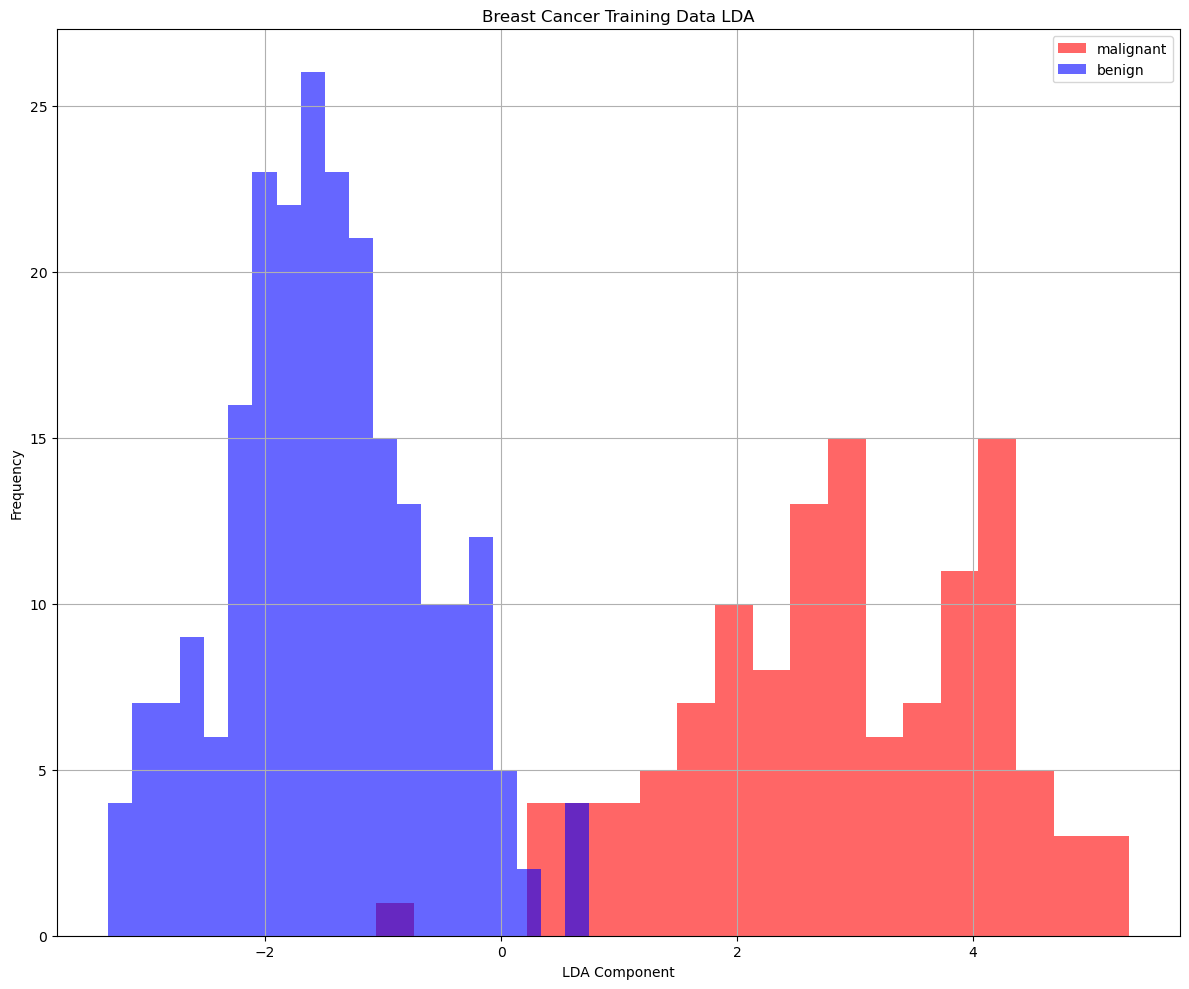

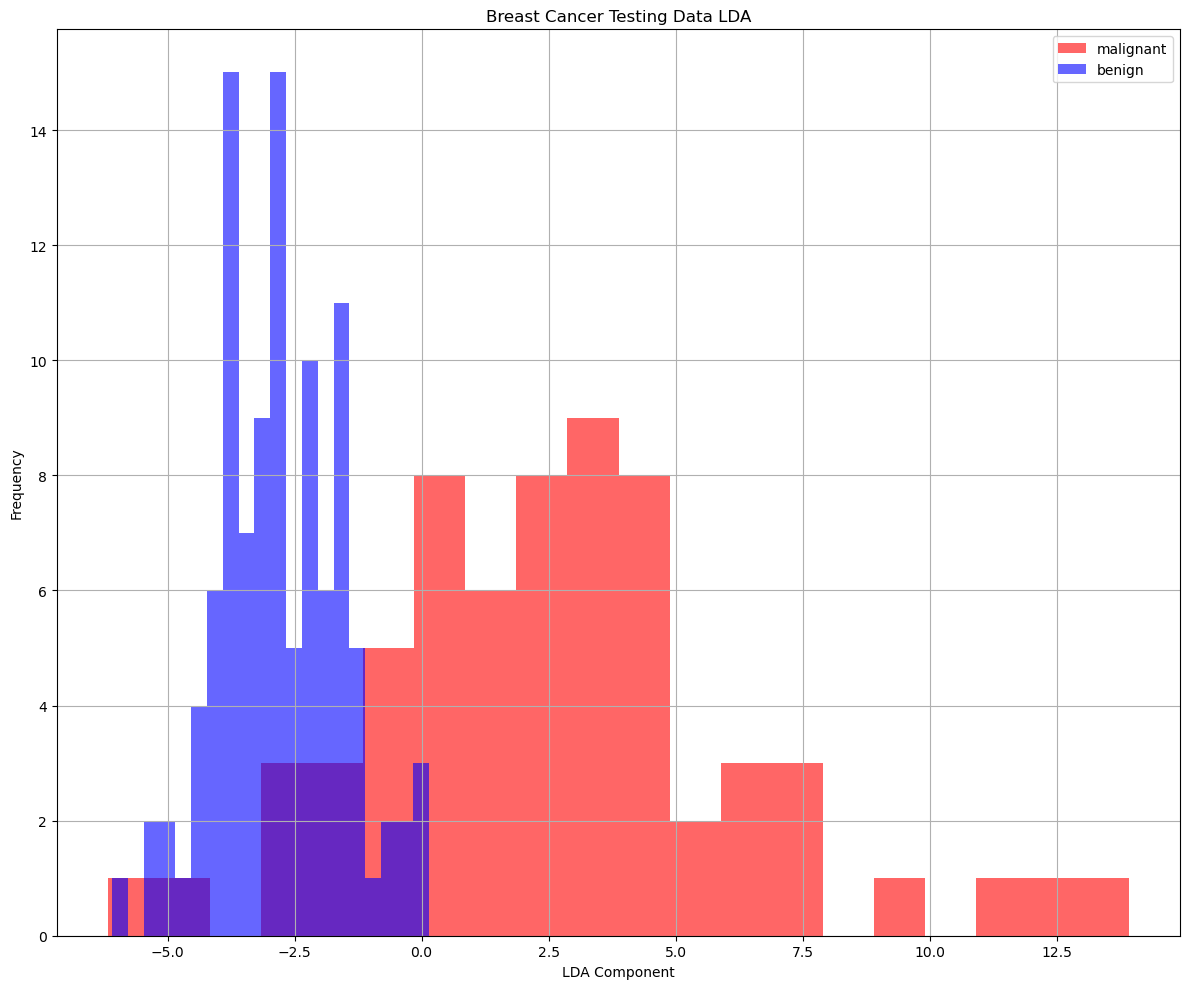

[I 2025-04-27 03:34:31,807] A new study created in memory with name: no-name-ab434718-e9f8-4a6e-91d8-4eaf56e87f54
[I 2025-04-27 03:34:36,563] Trial 0 finished with value: 0.971830985915493 and parameters: {'n_estimators': 3595, 'learning_rate': 0.0011882736471596686, 'num_leaves': 77, 'max_depth': 8, 'min_child_samples': 60, 'subsample': 0.4812361245182122, 'colsample_bytree': 0.853508259575379, 'reg_alpha': 7.261724488843514e-08, 'reg_lambda': 0.2412249320665304}. Best is trial 0 with value: 0.971830985915493.
[I 2025-04-27 03:34:38,380] Trial 1 finished with value: 0.9719874804381845 and parameters: {'n_estimators': 1708, 'learning_rate': 0.08233338375009511, 'num_leaves': 50, 'max_depth': 7, 'min_child_samples': 16, 'subsample': 0.9580934069038116, 'colsample_bytree': 0.48017885890481277, 'reg_alpha': 5.118550726625082e-07, 'reg_lambda': 0.76916959288608}. Best is trial 1 with value: 0.9719874804381845.
[I 2025-04-27 03:34:43,486] Trial 2 finished with value: 0.9775430359937403 and 

Best trial:
Accuracy: 0.9915884194053209
Best hyperparameters:  {'n_estimators': 6972, 'learning_rate': 0.02716761728134578, 'num_leaves': 71, 'max_depth': 12, 'min_child_samples': 13, 'subsample': 0.9205879393241747, 'colsample_bytree': 0.556610311402892, 'reg_alpha': 0.008368995681976306, 'reg_lambda': 4.7173881097953106e-05}


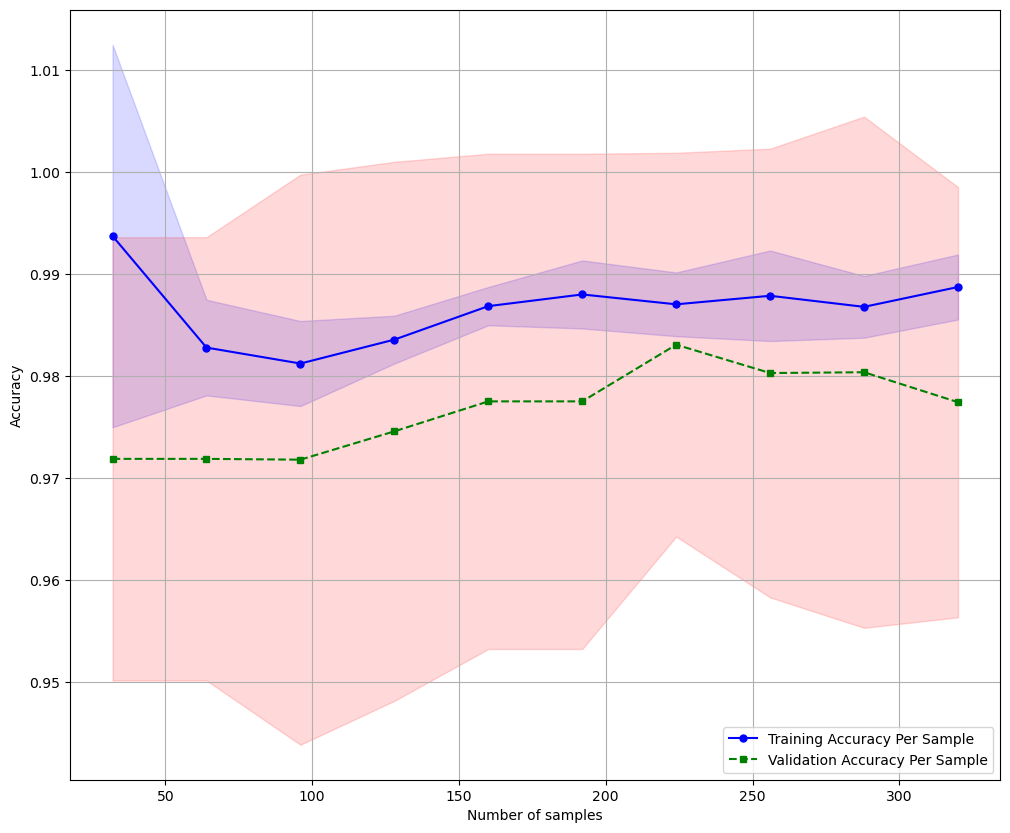

Confusion Matrix
[[ 48  16]
 [  0 107]]
Accuracy: 0.9064, Precision: 0.8699, Recall: 1.0000, F1: 0.9304, AUC:0.9295


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)